In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Dengue-Pakistan.csv", header=None)
df.columns = ['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths']
print(df.head())
print(df.shape)


      Month  Year  Region  Dengue_Cases  Dengue_Deaths
0   January  2016  Punjab           320              1
1  February  2016  Punjab           280              0
2     March  2016  Punjab           195              0
3     April  2016  Punjab           150              0
4       May  2016  Punjab           180              1
(420, 5)


In [5]:
df.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

In [6]:
# For ROw 
df.shape

(420, 5)

In [7]:
df.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Punjab,320,1
1,February,2016,Punjab,280,0
2,March,2016,Punjab,195,0
3,April,2016,Punjab,150,0
4,May,2016,Punjab,180,1


In [8]:
print('\n--- Summary ---')
print('Years in data:', df['Year'].unique())
print('Regions:', df['Region'].unique())
print('Total cases:', df['Dengue_Cases'].sum())
print('Total deaths:', df['Dengue_Deaths'].sum())


--- Summary ---
Years in data: [2016 2017 2018 2019 2020]
Regions: ['Punjab' 'Sindh' 'KPK' 'Balochistan' 'ICT' 'AJK' 'GB']
Total cases: 177135
Total deaths: 1165


In [9]:
# Make Dengue_Deaths, Dengue Cases numeric
df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])
df['Dengue_Deaths'] = pd.to_numeric(df['Dengue_Deaths'])

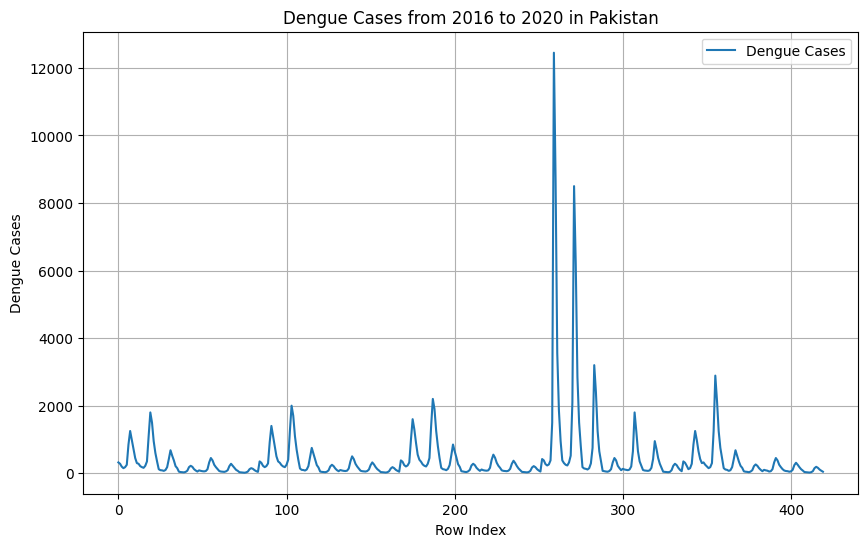

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(df['Dengue_Cases'], label='Dengue Cases')

plt.title('Dengue Cases from 2016 to 2020 in Pakistan')
plt.xlabel('Row Index')
plt.ylabel('Dengue Cases')
plt.legend()
plt.grid(True)
plt.show()

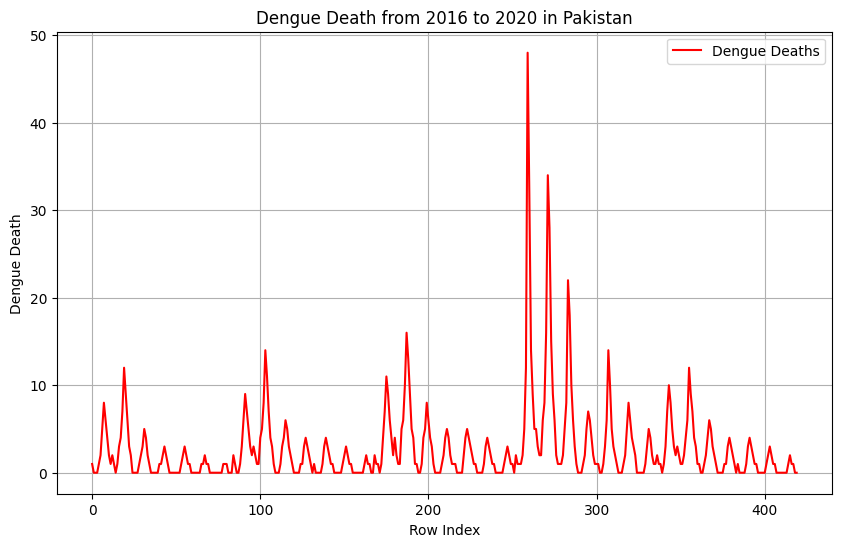

In [11]:


plt.figure(figsize=(10,6))

plt.plot(df['Dengue_Deaths'], label='Dengue Deaths', color='red')

plt.title('Dengue Death from 2016 to 2020 in Pakistan')
plt.xlabel('Row Index')
plt.ylabel('Dengue Death')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Punjab,320,1
1,February,2016,Punjab,280,0
2,March,2016,Punjab,195,0
3,April,2016,Punjab,150,0
4,May,2016,Punjab,180,1


In [13]:
df.tail()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
415,August,2020,GB,190,2
416,September,2020,GB,160,1
417,October,2020,GB,110,1
418,November,2020,GB,75,0
419,December,2020,GB,45,0


In [14]:
df.groupby('Year')['Dengue_Cases'].sum().reset_index().head()

,Year,Dengue_Cases
0,2016,22010
1,2017,24885
2,2018,28070
3,2019,77085
4,2020,25085


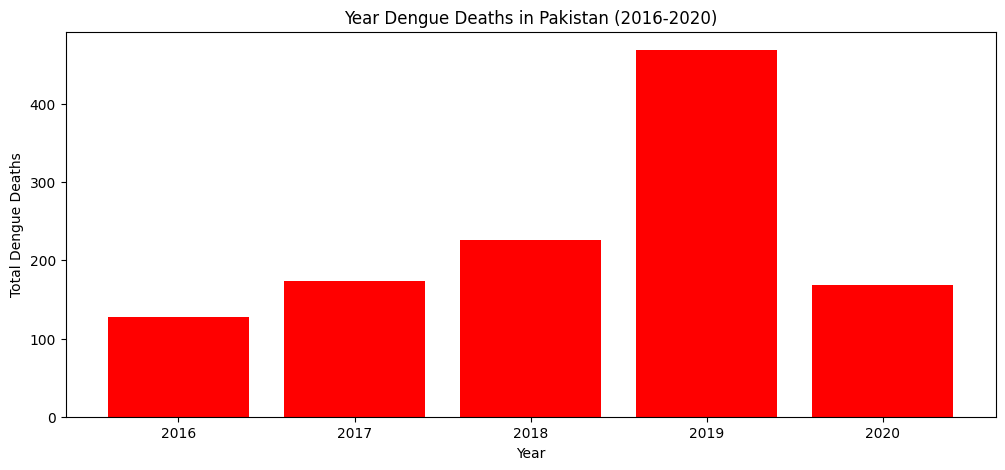

In [ ]:
# Year wise Dengue Deaths irrespective of Region
year_wise = df.groupby('Year')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.bar(year_wise['Year'], year_wise['Dengue_Deaths'], color='red')
plt.title('Year Dengue Deaths in Pakistan (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.show()

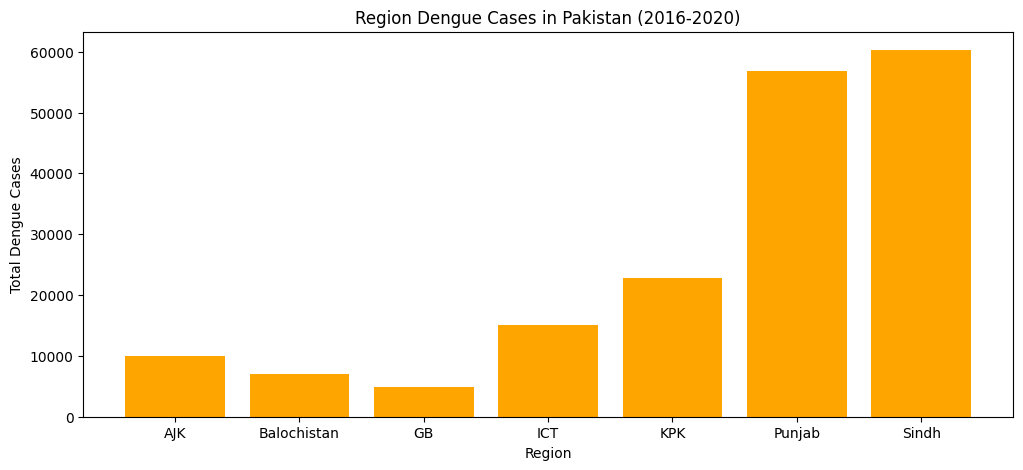

In [16]:
# Year wise Dengue Cases irrespective of Region
region_wise = df.groupby('Region')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.bar(region_wise['Region'], region_wise['Dengue_Cases'], color='orange')
plt.title('Region Dengue Cases in Pakistan (2016-2020)')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.show()

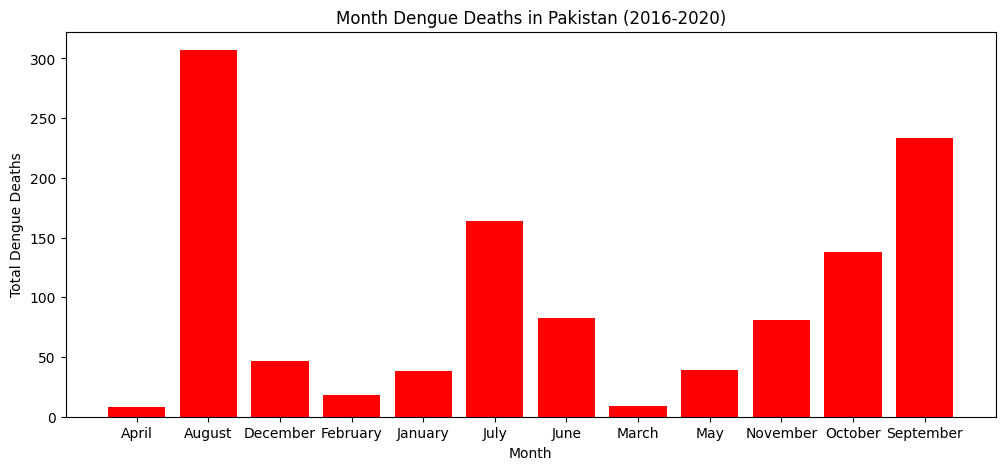

In [17]:
# Year wise Dengue Deaths irrespective of Region
month_wise = df.groupby('Month')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.bar(month_wise['Month'], month_wise['Dengue_Deaths'], color='red')
plt.title('Month Dengue Deaths in Pakistan (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Total Dengue Deaths')
plt.show()

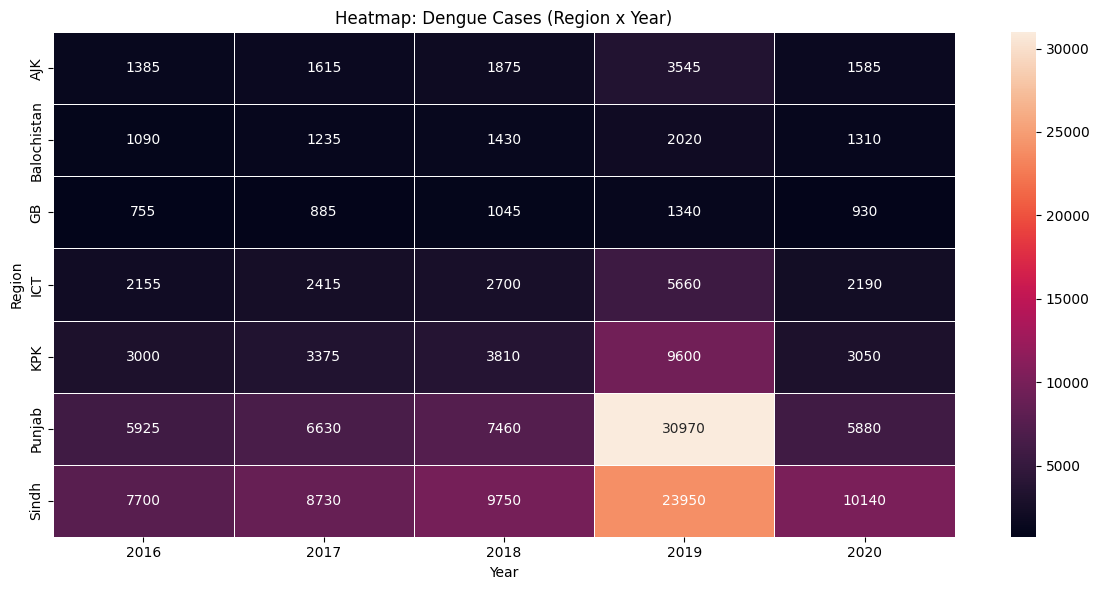

In [18]:
import seaborn as sns

year_region = df.groupby(['Year','Region'])['Dengue_Cases'].sum().reset_index()

pivot = year_region.pivot(index='Region', columns='Year', values='Dengue_Cases').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.0f', linewidths=.5)
plt.title('Heatmap: Dengue Cases (Region x Year)')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1296\829826218.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


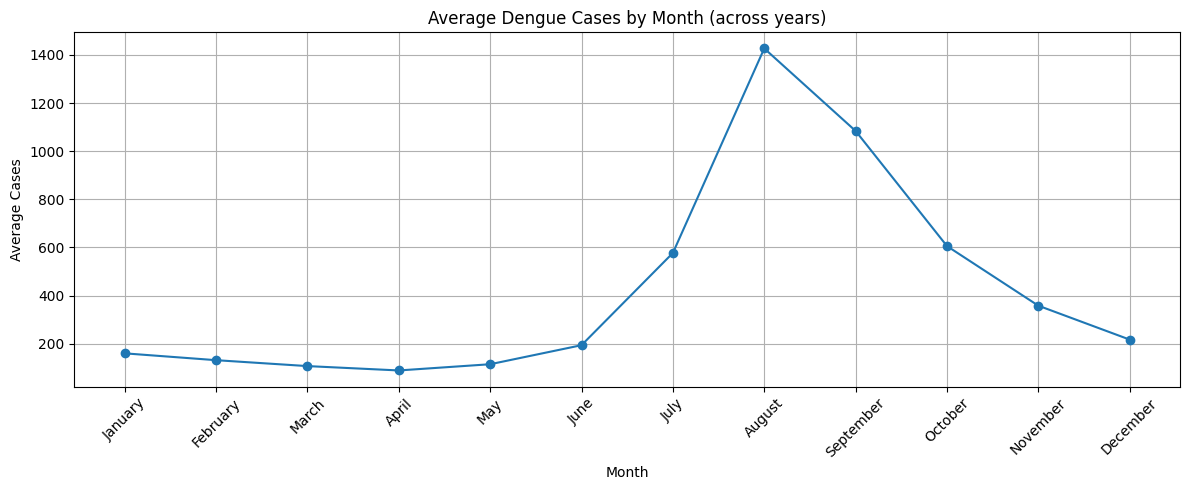

In [19]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
monthly_avg = df.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)
plt.figure(figsize=(12,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Average Dengue Cases by Month (across years)')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
df.to_csv("Dengue-Pakistan-Cleaned.csv", index=False)